In [1]:
import pyift.pyift as ift
import matplotlib.pyplot as plt

In [2]:
img = ift.ReadImageByExt("dog.png")

A = ift.Circular(1.0)

seeds = ift.ReadSeeds(img, "dog-seeds.txt")

basins = ift.ImageBasins(img, A)

label = ift.Watershed(basins, A, seeds, None)

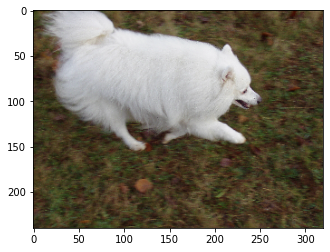

In [3]:
plt.imshow(img.ToPlot())

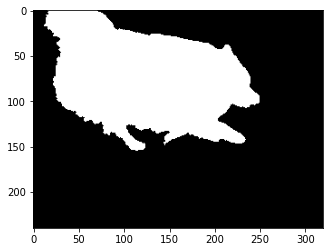

In [4]:
plt.imshow(label.ToPlot())

### Color images in pyift are stored in YCbCr. You may convert them to numpy arrays, but you will need a conversion from YCbCr to RGB in numpy.

In [5]:
import numpy as np

In [6]:
def rgb2ycbcr(im):
    cbcr = np.empty_like(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    # Y
    cbcr[:,:,0] = .299 * r + .587 * g + .114 * b
    # Cb
    cbcr[:,:,1] = 128 - .169 * r - .331 * g + .5 * b
    # Cr
    cbcr[:,:,2] = 128 + .5 * r - .419 * g - .081 * b
    return np.uint8(cbcr)

def ycbcr2rgb(im):
    rgb = np.empty_like(im)
    y   = im[:,:,0]
    cb  = im[:,:,1] - 128
    cr  = im[:,:,2] - 128
    # R
    rgb[:,:,0] = y + 1.402 * cr
    # G
    rgb[:,:,1] = y - .34414 * cb - .71414 * cr
    # B
    rgb[:,:,2] = y + 1.772 * cb
    return np.uint8(rgb)


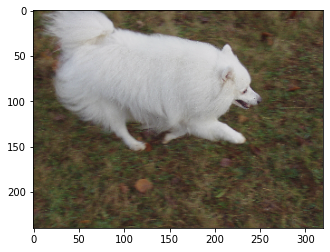

In [7]:
img = img.AsNumPy()
img = ycbcr2rgb(img)
plt.imshow(img)
plt.show()